In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [155]:
df = pd.read_csv(r"C:\Users\ryano\Documents\IBM Data Science Certification\Data\RainInAustralia\weatherAUS.csv")


In [156]:
df = df.dropna()

In [157]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

In [158]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]


In [159]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [160]:
# Exercise 1: Map the dates to seasons and drop the Date column
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

# Drop the 'Date' column
df = df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


In [161]:
# Exercise 2. Define the feature and target dataframes
# Define the feature and target dataframes
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


In [162]:
# Exercise 3. How balanced are the classes?
# Display the counts of each class.
y.value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

In [163]:
# Exercise 4. What can you conclude from these counts?
# Count rainy days per year
rainy_days = y.value_counts().get('Yes', 0)
total_days = y.shape[0]
print(f"A. How often does it rain annualy in the Melbourne area?")
print(f"Percentage of days with rain: {rainy_days / total_days * 100:.2f}%, \n")


accuracy_no_rain = y.value_counts().get('No', 0) / y.shape[0]
print(f"B. How accurate would you be if you just assumed it won't rain every day?")
print(f"Accuracy if always predicting 'No': {accuracy_no_rain:.2%}")
print(f"Fairly accurate if you say it won't rain, \n")
      
print(f"C. Is this a balanced dataset?")
print(y.value_counts(normalize=True))
print("\n")

print(f"D. Next Steps?")
print(f"1. Explore feature distributions and relationships with the target")
print(f"2. Split data into training and test sets")

A. How often does it rain annualy in the Melbourne area?
Percentage of days with rain: 23.70%, 

B. How accurate would you be if you just assumed it won't rain every day?
Accuracy if always predicting 'No': 76.30%
Fairly accurate if you say it won't rain, 

C. Is this a balanced dataset?
RainToday
No     0.763001
Yes    0.236999
Name: proportion, dtype: float64


D. Next Steps?
1. Explore feature distributions and relationships with the target
2. Split data into training and test sets


In [164]:
# EXERCISE 5. Split data into training and test sets, ensuring target stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [165]:
# Define preprocessing transformers for numerical and categorical features
# Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features

numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


In [166]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [167]:
#Exercise 7. Combine the transformers into a single preprocessing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [168]:
# Exercise 8. Create a pipeline by combining the preprocessing with a Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [169]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [170]:
# Exercise 9. Instantiate and fit GridSearchCV to the pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(
    pipeline, param_grid, cv=cv, scoring='accuracy', verbose=2
)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [171]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.86


In [172]:
# Exercise 10. Display your model's estimated score¶
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))


Test set score: 0.84


In [173]:
# Exercise 11. Get the model predictions from the grid search estimator on the unseen data
y_pred = grid_search.predict(X_test)

In [174]:
# Exercise 12. Print the classification report
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.51      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.84      0.83      1512



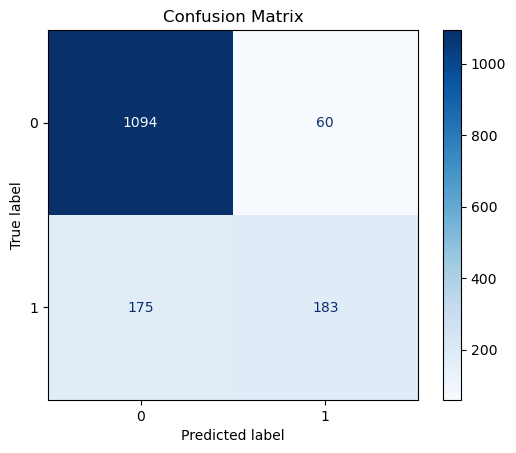

In [175]:
# Exercise 13. Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


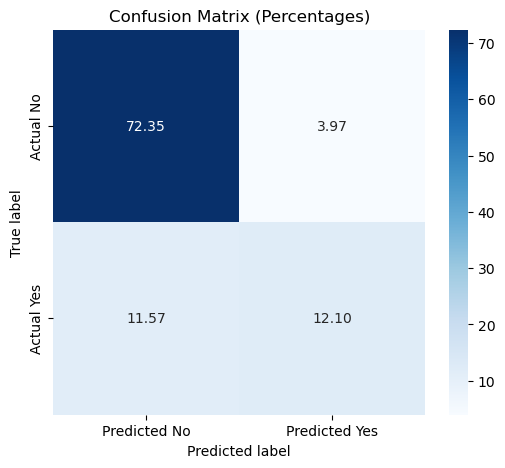

In [176]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage confusion matrix
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [177]:
#Exercise 14. Extract the feature importances
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

In [178]:
y_pred_rf = grid_search.predict(X_test)

Most important feature for predicting rain: Humidity3pm (Importance: 0.1208)


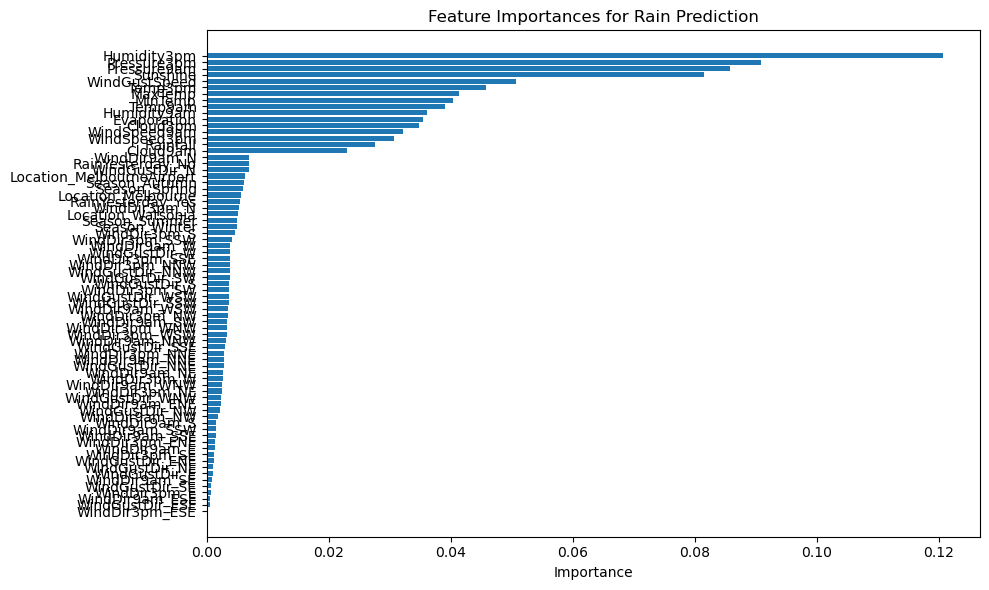

In [179]:
# QUESTION 2
# Get feature names after preprocessing
feature_names = (
    numeric_features +
    list(grid_search.best_estimator_['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the most important feature
most_important_feature = importance_df.iloc[0]
print(f"Most important feature for predicting rain: {most_important_feature['Feature']} (Importance: {most_important_feature['Importance']:.4f})")

# Optional: Plot the feature importances as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Rain Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [180]:
# QUESTION 4
#least_important_feature = importance_df.iloc[-1]
#print(f"Least important (most inefficient) feature for predicting rain: {least_important_feature['Feature']} (Importance: {least_important_feature['Importance']:.4f})")

# List all features with negligible importance
#inefficient_features = importance_df[importance_df['Importance'] < 0.01]
#print("Features with negligible importance (less than 0.01):")
#print(inefficient_features)

most_important_feature = importance_df.iloc[0]
print(f"Most important feature for predicting rain: {most_important_feature['Feature']} (Importance: {most_important_feature['Importance']:.4f})")

# Least important feature (answer to your new question)
least_important_feature = importance_df.iloc[-1]
print(f"Least important (most inefficient) feature for predicting rain: {least_important_feature['Feature']} (Importance: {least_important_feature['Importance']:.4f})")


Most important feature for predicting rain: Humidity3pm (Importance: 0.1208)
Least important (most inefficient) feature for predicting rain: WindDir3pm_ESE (Importance: 0.0003)


In [181]:
#Exercise 15. Update the pipeline and the parameter grid
from sklearn.linear_model import LogisticRegression

# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search.param_grid = param_grid

# Fit the updated pipeline with LogisticRegression
model = grid_search.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

y_pred_lr = model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Compare the accuracy percentages of both classifiers
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"RandomForestClassifier Accuracy: {accuracy_rf * 100:.2f}%")
print(f"LogisticRegression Accuracy: {accuracy_lr * 100:.2f}%")

# 2. Provide the details of the number of correct predictions
correct_rf = (y_pred_rf == y_test).sum()
correct_lr = (y_pred_lr == y_test).sum()

print(f"RandomForestClassifier Correct Predictions: {correct_rf} out of {len(y_test)}")
print(f"LogisticRegression Correct Predictions: {correct_lr} out of {len(y_test)}")

# 3. Provide the true positive rate (recall) of LogisticRegression Classifier
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
TP = conf_matrix_lr[1, 1]
FN = conf_matrix_lr[1, 0]
true_positive_rate_lr = TP / (TP + FN)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=["No", "Yes"])
TP = conf_matrix_rf[1, 1]
FN = conf_matrix_rf[1, 0]
true_positive_rate_rf = TP / (TP + FN) if (TP + FN) > 0 else 0


print(f"LogisticRegression True Positive Rate: {true_positive_rate_lr:.2f}")
print(f"RandomForestClassifier True Positive Rate: {true_positive_rate_rf:.2f}")


RandomForestClassifier Accuracy: 84.46%
LogisticRegression Accuracy: 82.80%
RandomForestClassifier Correct Predictions: 1277 out of 1512
LogisticRegression Correct Predictions: 1252 out of 1512
LogisticRegression True Positive Rate: 0.51
RandomForestClassifier True Positive Rate: 0.51
